In [1]:
# This file is intended to store NCVS analysis
# Add any necessary modules here
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Reading in data from clean csv - DO NOT EDIT
ncvs_csv_path = "../DataCleaning/NCVS_Clean"
ncvs_df = pd.read_csv(ncvs_csv_path)
ncvs_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

ager_csv_path = "../DataCleaning/group_ager_df"
group_ager_df = pd.read_csv(ager_csv_path)
group_ager_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

newcrime_csv_path = "../DataCleaning/group_newcrime_df"
group_newcrime_df = pd.read_csv(newcrime_csv_path)
group_newcrime_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

ager_newcrime_csv_path = "../DataCleaning/group_ager_newcrime_df"
group_ager_newcrime_df = pd.read_csv(ager_newcrime_csv_path)
group_ager_newcrime_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

year_ager_newcrime_csv_path = "../DataCleaning/group_year_ager_newcrime_df"
group_year_ager_newcrime_df = pd.read_csv(year_ager_newcrime_csv_path)
group_year_ager_newcrime_df.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

In [3]:
ncvs_df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
0,1996,3451.43740,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$25,000 to $34,999",Not a place,...,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,Other location
1,1996,2377.30718,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"$25,000 to $34,999",Not a place,...,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home"
2,1996,2687.23144,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$25,000 to $34,999","Under 100,000",...,"Yes, reported to the police",Do not know if offender had weapon,Do not know if offender had weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
3,1996,2555.83758,Female,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"$50,000 to $74,999","100,000 to 249,999",...,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
4,1996,3017.36110,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Never Married,"$15,000 to $24,999","Under 100,000",...,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not Injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."


In [4]:
group_ager_df

,ager,count,proportion
0,12 to 14,4424,0.094008
1,15 to 17,3975,0.084467
2,18 to 20,4081,0.086719
3,21 to 24,4568,0.097068
4,25 to 34,9770,0.207607
5,35 to 49,11781,0.250340
6,50 to 64,6614,0.140544
7,65 or older,1847,0.039248


In [5]:
group_newcrime_df

,newcrime,count,proportion
0,Personal theft/larceny,1489,0.03164
1,Violent victimization,45571,0.96836


In [6]:
group_ager_newcrime_df

,ager,newcrime,count,proportion,count_age,proportion_age
0,12 to 14,Personal theft/larceny,107,0.002274,4424,0.024186
1,12 to 14,Violent victimization,4317,0.091734,4424,0.975814
2,15 to 17,Personal theft/larceny,103,0.002189,3975,0.025912
3,15 to 17,Violent victimization,3872,0.082278,3975,0.974088
4,18 to 20,Personal theft/larceny,112,0.002380,4081,0.027444
5,18 to 20,Violent victimization,3969,0.084339,4081,0.972556
6,21 to 24,Personal theft/larceny,126,0.002677,4568,0.027583
7,21 to 24,Violent victimization,4442,0.094390,4568,0.972417
8,25 to 34,Personal theft/larceny,259,0.005504,9770,0.026510
9,25 to 34,Violent victimization,9511,0.202104,9770,0.973490


In [7]:
group_year_ager_newcrime_df

,year,ager,newcrime,count,proportion,count_year,proportion_year,count_year_ager,proportion_year_ager
0,1996,12 to 14,Personal theft/larceny,19,0.000404,3748,0.005069,490,0.038776
1,1996,12 to 14,Violent victimization,471,0.010008,3748,0.125667,490,0.961224
2,1996,15 to 17,Personal theft/larceny,9,0.000191,3748,0.002401,430,0.020930
3,1996,15 to 17,Violent victimization,421,0.008946,3748,0.112327,430,0.979070
4,1996,18 to 20,Personal theft/larceny,11,0.000234,3748,0.002935,367,0.029973
...,...,...,...,...,...,...,...,...,...
371,2019,35 to 49,Violent victimization,538,0.011432,2242,0.239964,546,0.985348
372,2019,50 to 64,Personal theft/larceny,13,0.000276,2242,0.005798,514,0.025292
373,2019,50 to 64,Violent victimization,501,0.010646,2242,0.223461,514,0.974708
374,2019,65 or older,Personal theft/larceny,9,0.000191,2242,0.004014,182,0.049451


<IPython.core.display.Javascript object>


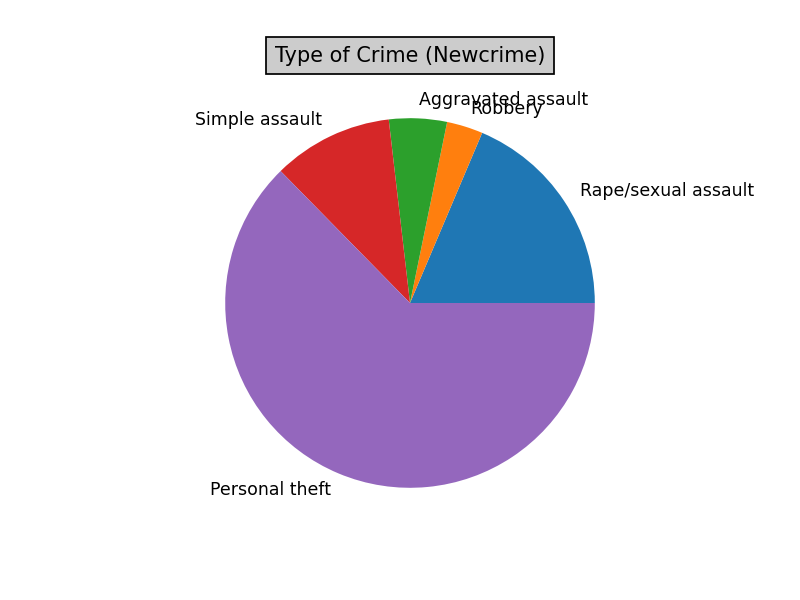

In [8]:
# Pie Chart "Type of Crime"
newoff_df = ncvs_df.groupby("newoff").count()
newoff_labels = ["Rape/sexual assault", "Robbery", "Aggravated assault", "Simple assault", "Personal theft"]
newoff_df = newoff_df["year"].tolist()
plt.pie(newoff_df, labels=newoff_labels)
plt.title("Type of Crime (Newcrime)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

<IPython.core.display.Javascript object>


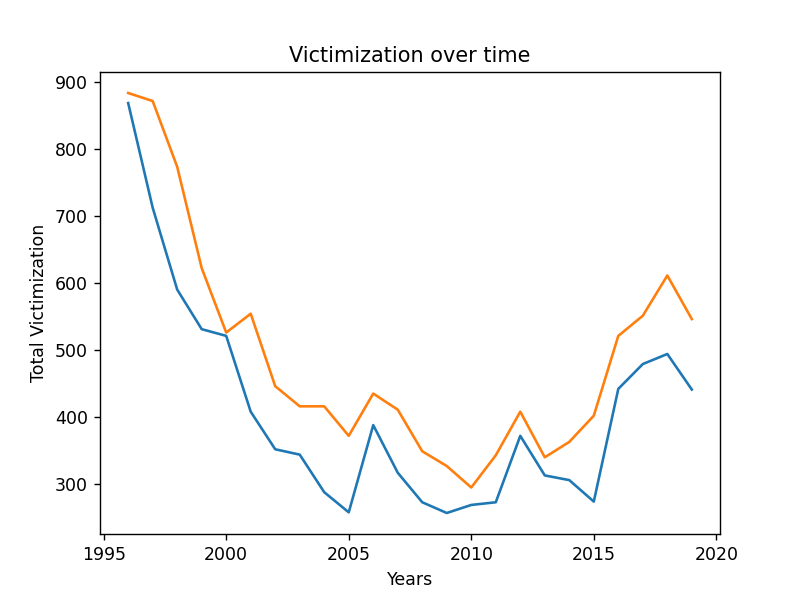

In [12]:
group_age = group_year_ager_newcrime_df[(group_year_ager_newcrime_df["ager"] == "25 to 34") | (group_year_ager_newcrime_df["ager"] == "35 to 49")]
#group_age.head()
age_vic = group_age.groupby(["year","ager"]).sum()
age_vic_reset = age_vic.reset_index()
# group_ages
first = group_age.query("ager == '25 to 34'")
second = group_age.query("ager == '35 to 49'")

plt.figure(2)

plt.plot(age_vic_reset.query("ager == '25 to 34'")['year'], age_vic_reset.query("ager == '25 to 34'")['count'])
plt.plot(age_vic_reset.query("ager == '35 to 49'")['year'], age_vic_reset.query("ager == '35 to 49'")['count'])
plt.xlabel("Years")
plt.ylabel("Total Victimization")
plt.title("Victimization over time")
#plt.plot(age_vic['year'], age_vic['count'])
plt.show()

# query, so we have the two data
# 